<a href="https://colab.research.google.com/github/rafaelportomoura/ufla-gcc128-inteligencia-artificial/blob/main/AG_Rafael_Porto_Vieira_de_Moura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercício de AG ( 10 pontos)

O trabalho pode ser feito em dupla (Nome do arquivo : AG_nomeAluno1_NomeAluno2.zip)
Encontrar de x para o qual a função $f(x) = x^2 - 3x + 4$, encontre o valor máximo .

- Assumir que $x [-10, +10]$
- Codificar $X$ como vetor binário
- Criar uma população inicial com 4  indivíduos  (pode usar mais para testar até 30)
- Aplicar Mutação com taxa de 1%
- Aplicar Crossover com taxa de 70%
- Usar seleção por torneio.
- Usar 5  gerações. ( pode usar mais para testar até 20)

Obs. Na implmentação utilizar os parametros ( num. de  indivíduos, num de geração, taxas de crossover e mutação)  como variáveis para ajdar no teste pra avaliar a qualidade dos resultados.

## Constants

In [2]:
import numpy

# Parameter initialization
GENES = 5
CHROMOSOMES = 4 # populacao inicial
ELITISM_SIZE = 2
OFFSPRING_SIZE = CHROMOSOMES - ELITISM_SIZE
CROSSOVER_POINT = 2
CROSSOVER_PROBABILITY = 0.7
MUTATION_PROBABILITY = 0.1
RANGE_MIN = -10
RANGE_MAX = 10
GENERATIONS = 10
FUNCTION = "x*x - 3 * x + 4"

## Logger

In [3]:
class Logger:
    def __init__(self,log_type: str):
        self.log_type = log_type if log_type else 'standard'
        self.__error__ = log_type in ['debug','info','standard', 'error']
        self.__info__ = log_type in ['debug','info','standard']
        self.__debug_logs__ = log_type in ['debug','standard']
        self.__log__ = log_type in ['debug','info','standard','log','error']

    def debug(self,*args):
        if(self.__debug_logs__):
            print(*args)
    def info(self,*args):
        if(self.__info__):
            print(*args)
    def error(self,*args):
        if(self.__error__):
            print(*args)
    def log(self,*args):
        if(self.__log__):
            print(*args)

logger = Logger('debug')

## Helpers

In [4]:
def intToBin(decimal):
    raw_bin = bin(decimal)
    signal = raw_bin[0]
    clean_bin = raw_bin.replace('-0','0').replace('0b','')

    if (signal == '-'):
        return f"1{clean_bin.zfill(GENES-1)}"
    else:
        return clean_bin.zfill(GENES)


def binToInt(binary):
    [sinal, *raw_bin] = binary
    integer = int(''.join(raw_bin),2)
    return -1 * integer if int(sinal,10) else integer

def print_bin_array(name: str,binary_array: list[str]):
    logger.info(f"{name}: {[binToInt(p) for p in binary_array]}#{binary_array}")

def check_range_of_binary(binary: str):
    integer = binToInt(binary)
    if integer > RANGE_MAX:
        return intToBin(RANGE_MAX)
    if integer < RANGE_MIN:
        return intToBin(RANGE_MIN)
    return binary

## Population

In [5]:
def set_new_population(range_min = RANGE_MIN, range_max = RANGE_MAX, chromosomes = CHROMOSOMES ):
    return [intToBin(numpy.random.randint(range_min,range_max)) for _ in range(chromosomes)]

## Fitness

In [8]:
def fitness(x):
    if type(x) == str:
        x = binToInt(x)

    return eval(FUNCTION)

## Plot Functions

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

X_AXIS = [_ for _ in range(RANGE_MIN,RANGE_MAX+1)]
Y_AXIS = [fitness(_) for _ in X_AXIS]
def plot(chromosome,fitness,generation: int):
    fig, ax = plt.subplots(figsize=(10,5), layout='constrained')
    ax.plot(X_AXIS,Y_AXIS, label="range", color='0.8')
    ax.scatter(chromosome, fitness, s=50, facecolor='g', edgecolor='k',label=f"Fitness of Generation {generation}")
    ax.set_xlabel('chromosome')  # Add an x-label to the axes.
    ax.set_ylabel('fitness')  # Add a y-label to the axes.
    ax.set_title(f"Generation {generation} plot")
    ax.legend()  # Add a legend.


Gerações


🧬 Generation: 1
Population: [-2, 8, 1, 6]#['10010', '01000', '00001', '00110']
Fitness: [14, 44, 2, 22]
Better: 8 -> 44 
Parents: [8, 6]#['01000', '00110']
Offspring after crossover: [10, 0]#['01010', '00000']
	🫣 Na possição 0, não houve mutação! Taxa de herança: 0.379223143771257
	🫣 Na possição 1, não houve mutação! Taxa de herança: 0.5147743650246732
Offspring after mutation: [10, 0]#['01010', '00000']
----------------------------------------------
🧬 Generation: 2
Population: [8, 6, 10, 0]#['01000', '00110', '01010', '00000']
Fitness: [44, 22, 74, 4]
Better: 10 -> 74 
Parents: [10, 8]#['01010', '01000']
	😒 Na possição 0, não houve crossover! Taxa de infertilidade: 0.9961480281261482
Offspring after crossover: [10, 10]#['01010', '01010']
	☢️ Mutation([0][0]): 01010 -> 11010
	🫣 Na possição 1, não houve mutação! Taxa de herança: 0.42897673207365195
Offspring after mutation: [-10, 10]#['11010', '01010']
----------------------------------------------
🧬 Generation: 3
Population: [10, 8, -1

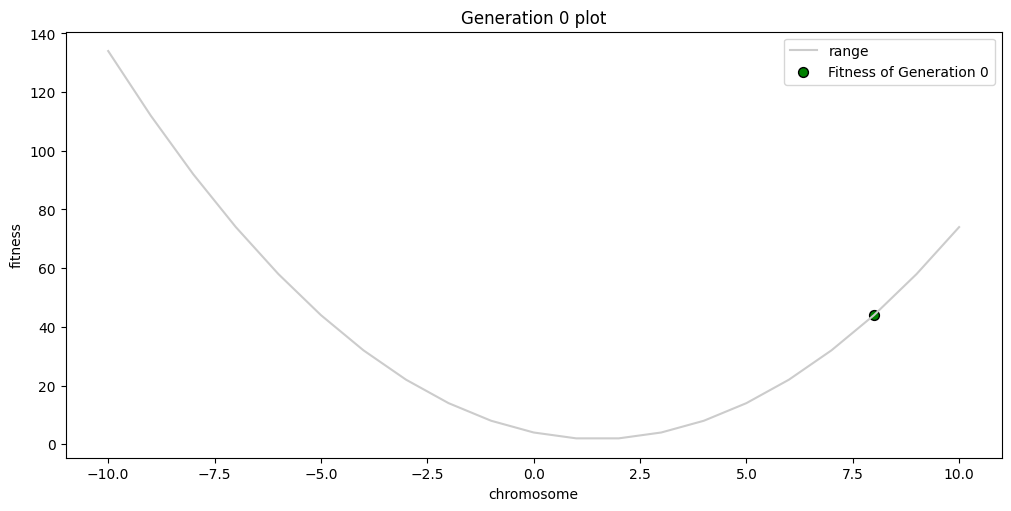

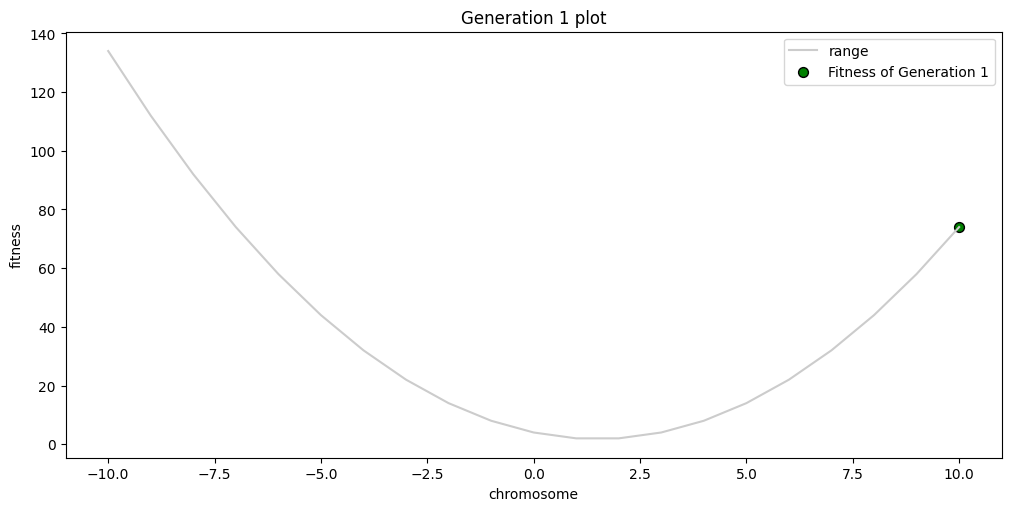

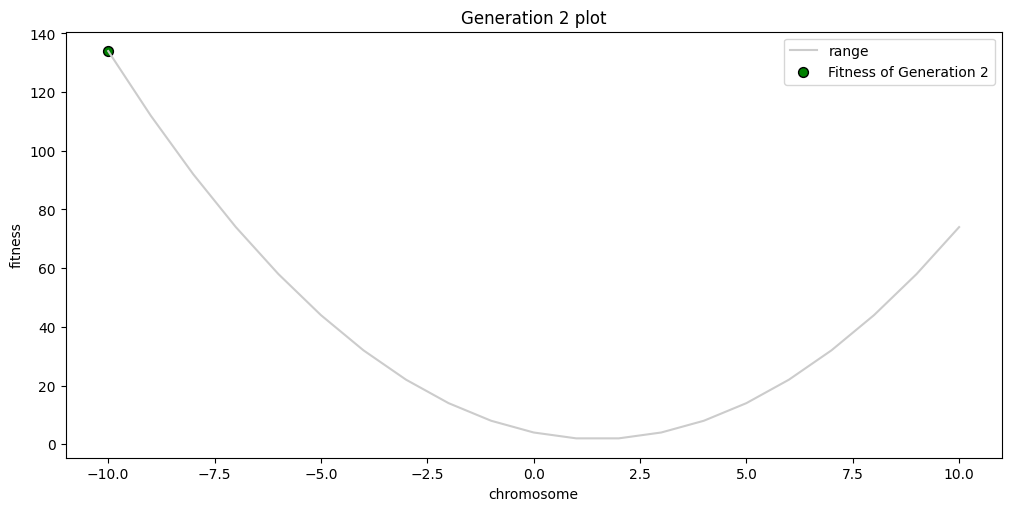

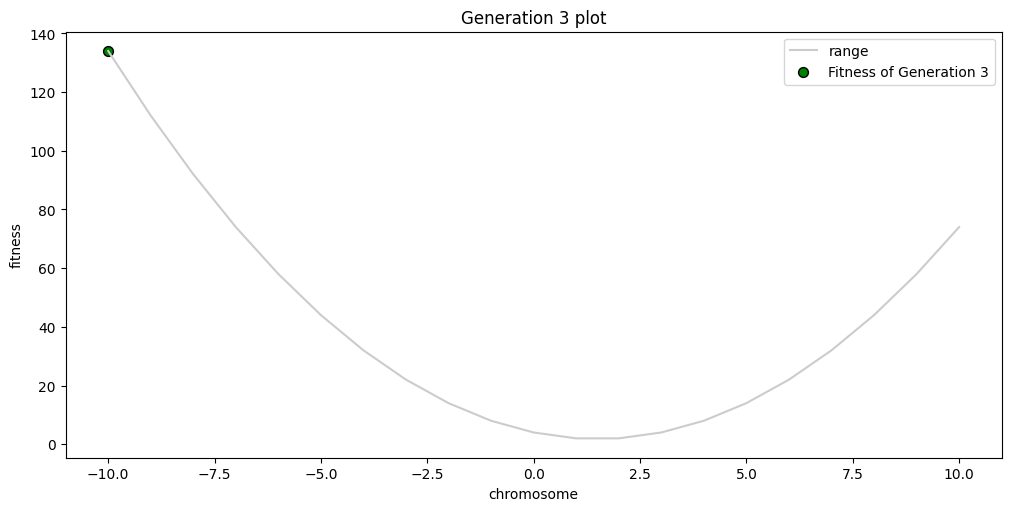

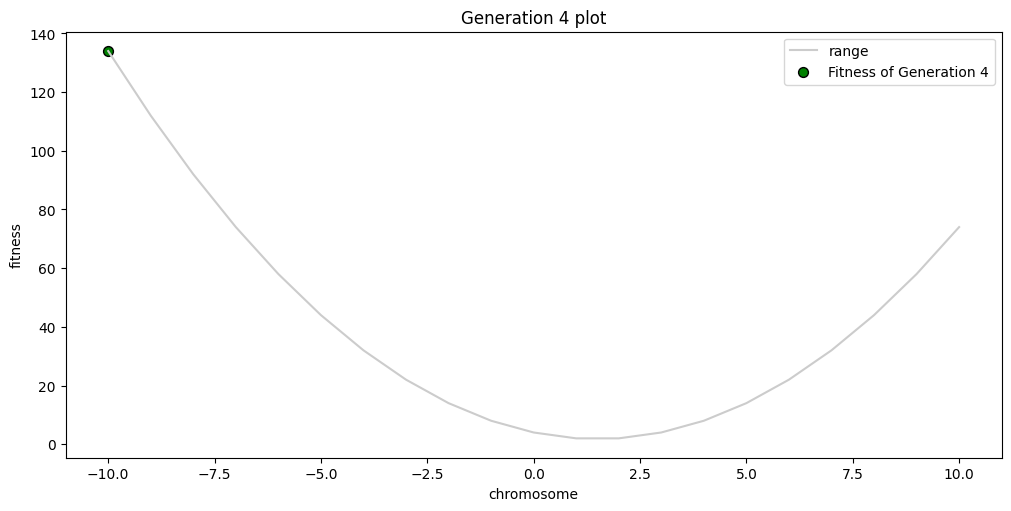

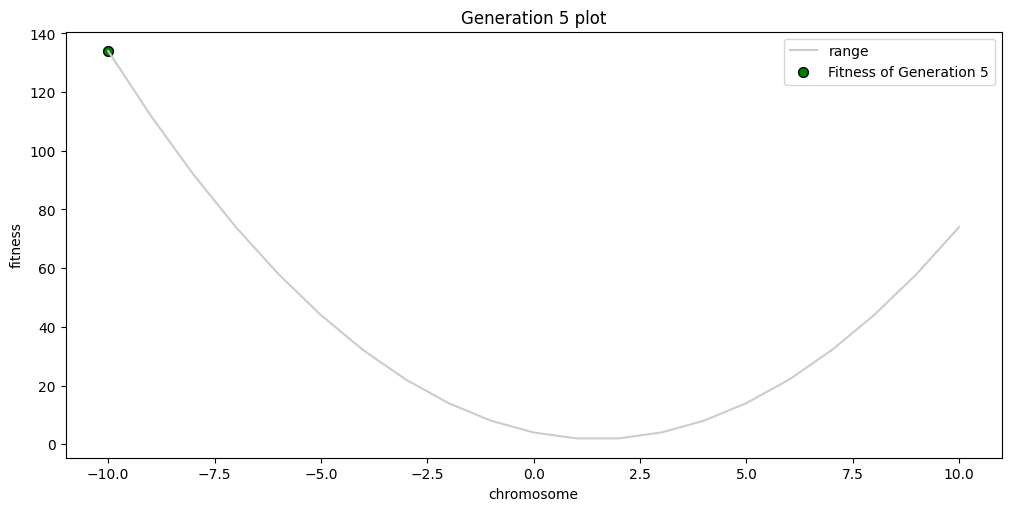

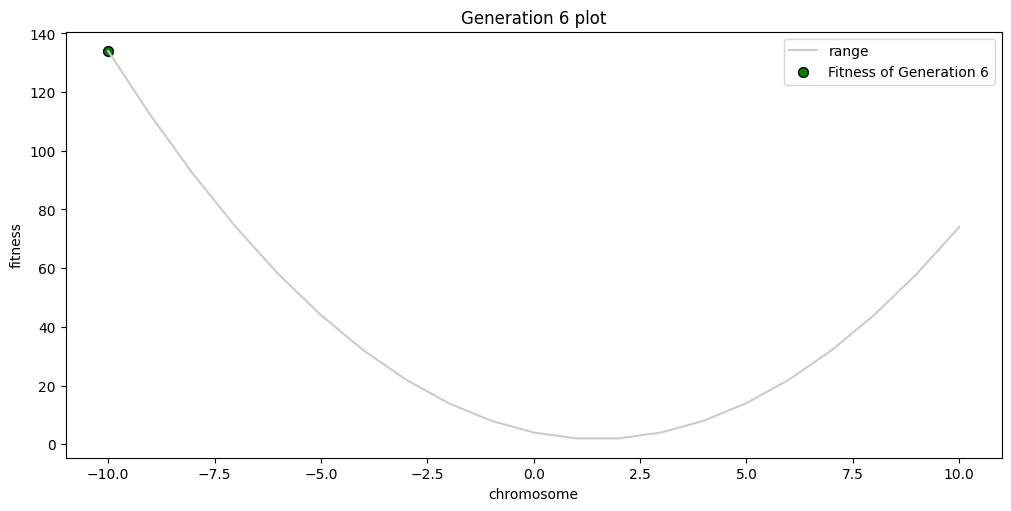

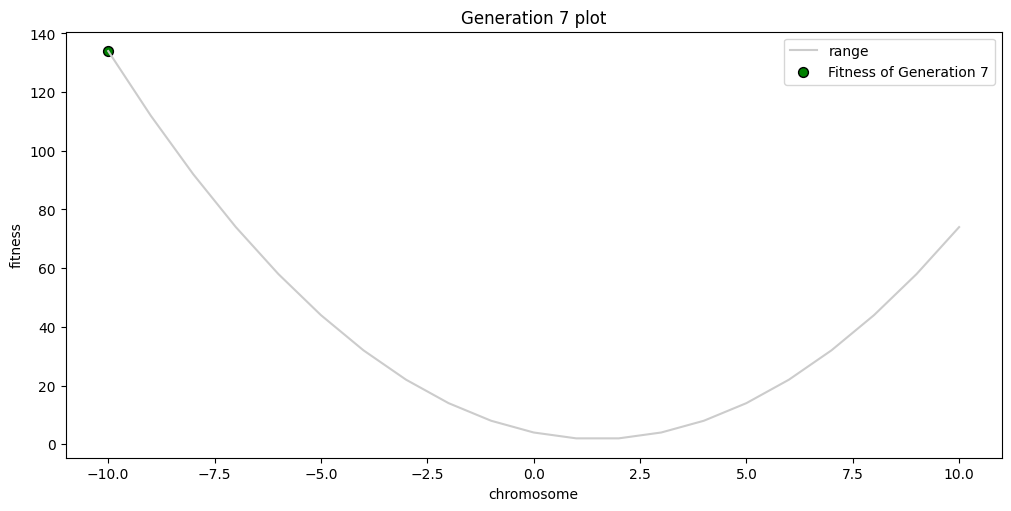

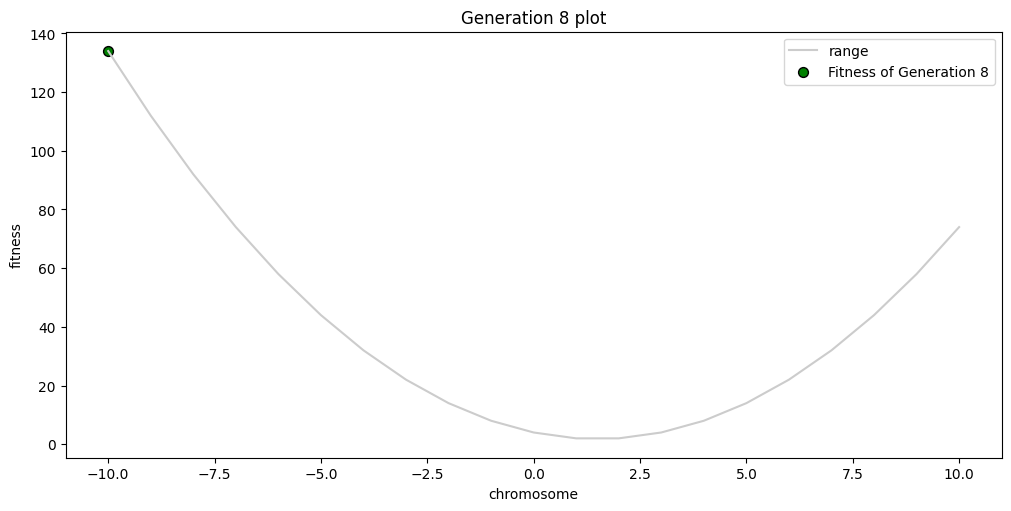

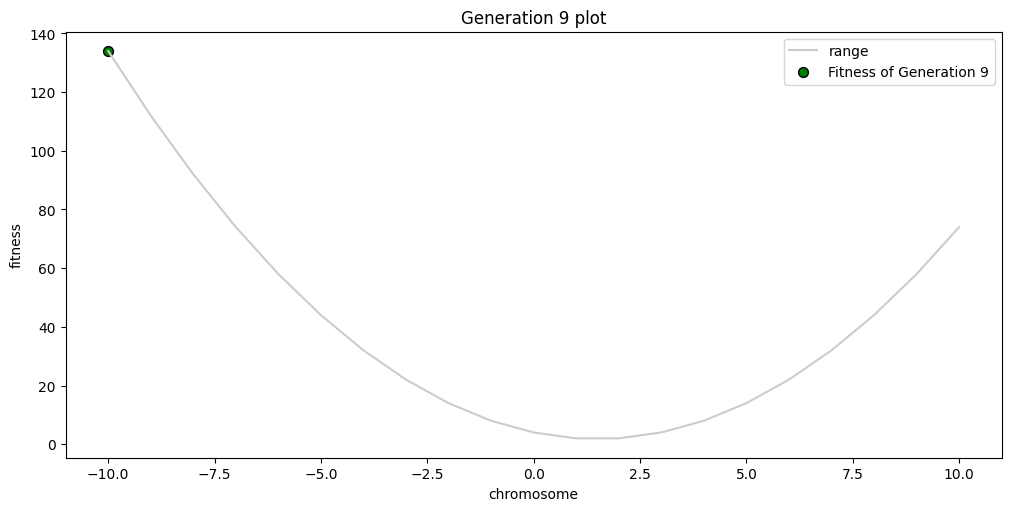

In [10]:
population = set_new_population()
for generation in range(GENERATIONS):
    logger.log(f"🧬 Generation: {generation + 1}")
    print_bin_array('Population', population)
    fitness_arr = [fitness(x) for x in population]
    logger.info(f"Fitness: {fitness_arr}")

    parents = ["" for _ in range(ELITISM_SIZE)]

    better = {
        'chromosome': binToInt(population[numpy.where(fitness_arr == numpy.max(fitness_arr))[0][0]]),
        'fitness':  numpy.max(fitness_arr),
    }
    logger.info(f"Better: {better['chromosome']} -> {better['fitness']} ")
    plot(better['chromosome'], better['fitness'],generation)

    for p in range(ELITISM_SIZE):
        fittestIndex = numpy.where(fitness_arr == numpy.max(fitness_arr))
        fittestIndex = fittestIndex[0][0]
        parents[p] = population[fittestIndex]
        fitness_arr[fittestIndex] = -1

    print_bin_array("Parents",parents)

    offspring = [["" for _ in range(GENES)] for _ in range(OFFSPRING_SIZE)]
    for k in range(OFFSPRING_SIZE):
        probability = numpy.random.uniform(0,1)

        if (probability > CROSSOVER_PROBABILITY):
            logger.debug(f'\t😒 Na possição {k}, não houve crossover! Taxa de infertilidade: {probability}')
            offspring[k] = parents[k%ELITISM_SIZE]
            continue

        parent_one_index = k%ELITISM_SIZE
        parent_two_index = (k+1)%ELITISM_SIZE

        offspring[k][0:CROSSOVER_POINT] = parents[parent_one_index][0:CROSSOVER_POINT]
        offspring[k][CROSSOVER_POINT:] = parents[parent_two_index][CROSSOVER_POINT:]
        offspring[k] = check_range_of_binary("".join(offspring[k]))

    print_bin_array("Offspring after crossover", offspring)

    for index in range(OFFSPRING_SIZE):
        probability = numpy.random.uniform(0,1)

        if (probability > MUTATION_PROBABILITY):
            logger.debug(f'\t🫣 Na possição {index}, não houve mutação! Taxa de herança: {probability}')
            continue

        random_gene = numpy.random.randint(0,GENES)

        before =  offspring[index]
        array_of_genes = [_ for _ in offspring[index]]
        array_of_genes[random_gene] = '0' if array_of_genes[random_gene] == '1' else '1'
        offspring[index] = check_range_of_binary("".join(array_of_genes))
        logger.debug(f'\t☢️ Mutation([{index}][{random_gene}]): {before} -> {offspring[index]}')

    print_bin_array("Offspring after mutation", offspring)

    population[0:ELITISM_SIZE] = parents
    population[ELITISM_SIZE:] = offspring

    logger.log(f"----------------------------------------------")